# Machine Learning Video Notes 1: Regression


Notes for this video series: https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v 

Standard Youtube License

## Video 2: Regression Intro

In [192]:
import pandas as pd
import quandl, math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [246]:
import pickle

In [193]:
df = quandl.get('WIKI/GOOGL')

In [194]:
df = df[['Adj. Open',  'Adj. High',   'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [195]:
df['HL_PCT'] = (df['Adj. High']- df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close']- df['Adj. Open'])/df['Adj. Open']*100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


## Video 3: Regression Features and Labels

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3157 entries, 2004-08-19 to 2017-03-03
Data columns (total 4 columns):
Adj. Close     3157 non-null float64
HL_PCT         3157 non-null float64
PCT_change     3157 non-null float64
Adj. Volume    3157 non-null float64
dtypes: float64(4)
memory usage: 123.3 KB


In [197]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [198]:
forecast_col = 'Adj. Close'
#df.fillna(-99999, inplace = True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3157 entries, 2004-08-19 to 2017-03-03
Data columns (total 4 columns):
Adj. Close     3157 non-null float64
HL_PCT         3157 non-null float64
PCT_change     3157 non-null float64
Adj. Volume    3157 non-null float64
dtypes: float64(4)
memory usage: 123.3 KB


In [200]:
forecast_out = int(math.ceil(0.01*len(df)))

In [201]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [202]:
#shift the rows of the column label which initially equals to "Adj.close" down by forecast_out days
df['label'] = df[forecast_col].shift(-forecast_out)

## Video 4: Regression training and testing

In [206]:
x = preprocessing.scale(x) 
#standardize the dataset along x

In [207]:
y = np.array(df['label'])

In [208]:
print(len(x), len(y))

3125 3125


In [209]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y,
                                                                    test_size=0.2)

In [177]:
clf = LinearRegression()

clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.96962259571


In [178]:
print(forecast_out)

32


In [179]:
clf = svm.SVR()

clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.830554131191


## Video 5: Regression forecasting and predicting

In [229]:
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3157 entries, 2004-08-19 to 2017-03-03
Data columns (total 4 columns):
Adj. Close     3157 non-null float64
HL_PCT         3157 non-null float64
PCT_change     3157 non-null float64
Adj. Volume    3157 non-null float64
dtypes: float64(4)
memory usage: 123.3 KB


In [231]:
#df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3157 entries, 2004-08-19 to 2017-03-03
Data columns (total 5 columns):
Adj. Close     3157 non-null float64
HL_PCT         3157 non-null float64
PCT_change     3157 non-null float64
Adj. Volume    3157 non-null float64
label          3125 non-null float64
dtypes: float64(5)
memory usage: 148.0 KB


In [233]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-02-27,849.67,0.901526,0.558613,1010333.0,NaN
2017-02-28,844.93,0.874368,-0.285596,1383119.0,NaN
2017-03-01,856.75,1.048147,0.630741,1818671.0,NaN
2017-03-02,849.85,0.914279,-0.754400,1243221.0,NaN
2017-03-03,849.08,0.720191,0.016491,999655.0,NaN


In [234]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]  # forecast percent = 0.01 as above suggested, last 1% of the data
X = X[:-forecast_out]   # first 99% of the data

In [236]:
df.dropna(inplace=True)

y = np.array(df['label'])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3125 entries, 2004-08-19 to 2017-01-17
Data columns (total 5 columns):
Adj. Close     3125 non-null float64
HL_PCT         3125 non-null float64
PCT_change     3125 non-null float64
Adj. Volume    3125 non-null float64
label          3125 non-null float64
dtypes: float64(5)
memory usage: 146.5 KB


In [237]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [238]:
print(confidence)

0.971152607527


In [239]:
forecast_set = clf.predict(X_lately)

In [240]:
print(forecast_set, confidence, forecast_out)

[ 837.61188686  832.67354566  836.7206259   851.84767793  857.52688275
  866.45280891  864.34981862  850.85890433  830.48862635  828.1789719
  822.85664437  826.29360747  828.47365175  829.99453632  837.43194125
  838.11479533  838.55606613  843.21493656  847.41420722  848.49829789
  845.70666788  850.76613921  854.84128677  857.66488759  859.68463309
  859.00701458  856.15493578  858.08744111  853.10375287  864.70163285
  857.94935735  857.51666832] 0.971152607527 32


In [241]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [242]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

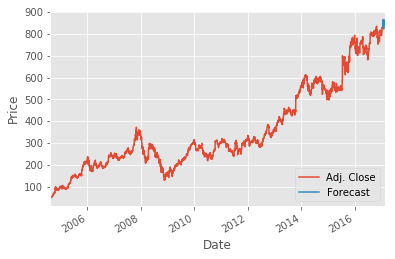

In [243]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Video 6: Pickling and Scaling

In [255]:
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'

In [256]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3157 entries, 2004-08-19 to 2017-03-03
Data columns (total 4 columns):
Adj. Close     3157 non-null float64
HL_PCT         3157 non-null float64
PCT_change     3157 non-null float64
Adj. Volume    3157 non-null float64
dtypes: float64(4)
memory usage: 123.3 KB


In [257]:
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.info()

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3157 entries, 2004-08-19 to 2017-03-03
Data columns (total 5 columns):
Adj. Close     3157 non-null float64
HL_PCT         3157 non-null float64
PCT_change     3157 non-null float64
Adj. Volume    3157 non-null float64
label          3125 non-null float64
dtypes: float64(5)
memory usage: 148.0 KB


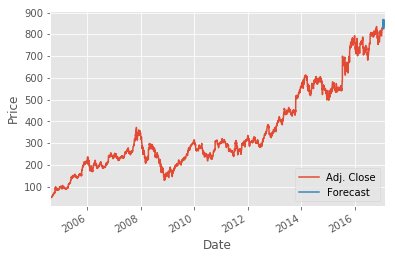

In [258]:
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

##save clf to pickle
with open ('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)
    

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)
#############

confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Video 7: Regression How it Works

Y = m* x + b

In the case of two-dimension data, regression model is to find m and b in this formula

use mean x and y to solve m and b (see pic)

explanation: http://scienceblogs.com/goodmath/2008/03/27/introduction-to-linear-regress/

## Video 8: How to Program the Best Fit Slope

In [271]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
style.use('fivethirtyeight')

In [261]:
xs = np.array([1, 2, 3, 4, 5, 6], dtype = np.float64)
ys = np.array([5, 6, 7, 8, 7, 9], dtype = np.float64)

In [265]:
def best_fit_slope(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean (xs * ys)) /
        (mean(xs)**2 - mean (xs**2)))
    return m

In [266]:
m = best_fit_slope(xs, ys)
print(m)

0.685714285714


## Video 9: How to Program the Best Fit Line

In [267]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean (xs * ys)) /
        (mean(xs)**2 - mean (xs**2)))
    b = mean(ys) - m * mean(xs)
    return m, b

In [269]:
m, b = best_fit_slope_and_intercept(xs, ys)
print(m, b)

0.685714285714 4.6


In [270]:
regression_line = [(m*x)+b for x in xs]

In [273]:
predict_x =8
predict_y = (m*predict_x) +b

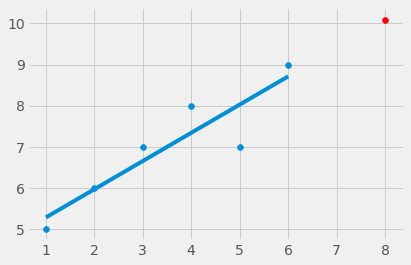

In [274]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color ='r')
plt.plot(xs, regression_line)
plt.show()

## Video 10: R Squared Theory

R ^2 = 1 - SE(y hat)/SE(y mean) 

(see pic)

(also known as coefficient of determination)

Y hat should be better than y mean because that's our regression line(also called y expected). 

We want SE y hat to be very small proportional to the SE of y mean. As a result, we will have larger
R^2. That is, we want R square to be lareger

## Video 11: Programming R Squared

In [275]:
def squared_error (ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [278]:
def coefficient_of_determination (ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error (ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1- (squared_error_regr / squared_error_y_mean)

In [279]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.822857142857


## Video 12: Testing Assumptions

In [280]:
import random

In [281]:
def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    ys =[]
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

In [283]:
xs, ys = create_dataset(40, 40, 2, correlation ='pos')
regression_line = [(m*x)+b for x in xs]

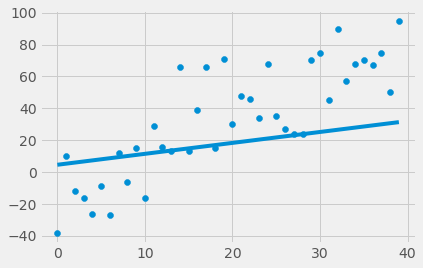

In [284]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()